#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Practica 6: Aplicación de SVM Regresión  a datos de 'tips'  : Ibarra Ramírez Sergio </font>

Recordar que el SVM regressor tendrá como parámetros el valor de C o labda de penalización y el ancho de calle permido para el SVM 

Primero importamos los datos de propinas 

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Vamos a separar las variables independientes de la dependiente y los sets de train y test

In [2]:
import pandas as pd


from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tips["tip"] 
X = tips.drop(["tip",'sex','smoker','day','time'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)
X_train

,total_bill,size
158,13.39,2
186,20.90,3
21,20.29,2
74,14.73,2
43,9.68,2
...,...,...
161,12.66,2
183,23.17,4
198,13.00,2
25,17.81,4


In [3]:
X_train.max()

total_bill    50.81
size           6.00
dtype: float64

#### Vamos a normalizar los datos

Primero X_train

In [4]:
X_train_normalizada = X_train.div(X_train.max())
X_train_normalizada

,total_bill,size
158,0.263531,0.333333
186,0.411336,0.500000
21,0.399331,0.333333
74,0.289904,0.333333
43,0.190514,0.333333
...,...,...
161,0.249164,0.333333
183,0.456013,0.666667
198,0.255855,0.333333
25,0.350522,0.666667


Seguimos con X_test

In [6]:
X_test_normalizada = X_test.div(X_test.max())
X_test_normalizada.head()

,total_bill,size
154,0.446275,0.666667
4,0.555079,0.666667
30,0.215576,0.333333
75,0.237246,0.333333
33,0.467043,0.666667


Recorcar que para el caso del SVR combie normalizar también la variable dependiente Y, ya que el SVM se calcula con la diferencia entre esta variable y la calculada con Xi 

In [7]:
y_train_normalizada = y_train.div(y_train.max())
y_train_normalizada

158    0.261
186    0.350
21     0.275
74     0.220
43     0.132
       ...  
161    0.250
183    0.650
198    0.200
25     0.234
87     0.400
Name: tip, Length: 195, dtype: float64

In [9]:
y_test_normalizada = y_test.div(y_train.max())
y_test_normalizada.head()

154    0.200
4      0.361
30     0.145
75     0.125
33     0.245
Name: tip, dtype: float64

Vamos a importar la libreria necesaria para implementar el modeo SVR 

In [11]:
from sklearn.svm import SVR

Vamos a definir el modelo SVR

In [15]:
epsilon1 = 0.1

In [18]:
modelo_SVR1 = SVR(kernel='linear',C=1,epsilon=epsilon1)

Entrenamos el modelo SVR

In [19]:
modelo_SVR1.fit(X_train_normalizada, y_train_normalizada)

SVR(C=1, kernel='linear')

Vamos a predecir con el modleo SVR y calcular el error 

In [20]:
from sklearn.metrics import mean_squared_error

y_pred_SVR1 =  modelo_SVR1.predict(X_test_normalizada)
RMSE_SVR1 = mean_squared_error(y_test_normalizada,y_pred_SVR1,squared=False)
print(RMSE_SVR1)

0.10674494892780276


 Dado el modelo modelo_SVR1 se obtiene su ecuación y los support vector machines 

In [35]:
modelo_SVR1_equation_coefs = modelo_SVR1.coef_
print("Equation coefficients:", modelo_SVR1_equation_coefs)

Equation coefficients: [[0.39682329 0.08125461]]


In [36]:
modelo_SVR1_support_vectors = modelo_SVR1.support_vectors_
print("Support vectors:", modelo_SVR1_support_vectors)


Support vectors: [[0.18893919 0.33333333]
 [0.74808109 0.66666667]
 [0.28163747 0.33333333]
 [0.77583153 0.66666667]
 [0.53493407 0.33333333]
 [0.49753985 0.33333333]
 [0.95000984 0.66666667]
 [0.59161582 0.5       ]
 [0.89254084 0.5       ]
 [0.49773667 0.66666667]
 [0.79807125 0.33333333]
 [0.56189726 0.5       ]
 [0.30879748 0.33333333]
 [0.37551663 0.33333333]
 [0.59948829 0.83333333]
 [0.36685692 0.5       ]
 [0.40326707 0.33333333]
 [0.3023027  0.33333333]
 [0.64613265 0.33333333]
 [0.22849833 0.33333333]
 [0.51977957 0.33333333]
 [0.59830742 0.66666667]
 [0.30348357 0.33333333]
 [0.47254477 0.66666667]
 [0.35268648 0.33333333]
 [0.334383   0.33333333]
 [0.24798268 0.33333333]
 [0.63766975 0.66666667]
 [0.32119661 0.33333333]
 [1.         0.5       ]
 [0.4831726  0.66666667]
 [0.4375123  0.33333333]
 [0.64318048 0.33333333]
 [0.32454241 0.66666667]
 [0.44912419 0.5       ]
 [0.41172997 0.33333333]
 [0.55973234 0.33333333]
 [0.32631372 0.33333333]
 [0.47766188 0.33333333]
 [0.3507

Visualización del modelo SVR con zoom en la variable 'total_bill' (con epsilo1)

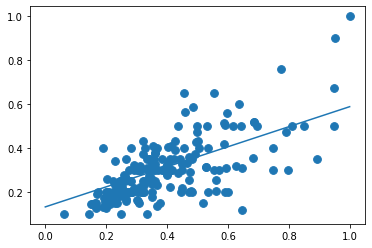

In [24]:
import matplotlib.pyplot as plt

modeloV_SVR = SVR(kernel='linear',C=1,epsilon=epsilon1)

modeloV_SVR.fit(X_train_normalizada["total_bill"].to_numpy().reshape(-1, 1), y_train_normalizada)

import numpy as np

x_func = np.linspace(0,1,100)
y_func = modeloV_SVR.predict(x_func.reshape(-1, 1))
x_points = X_train_normalizada["total_bill"]
y_points = y_train_normalizada

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Para poder hacer una especie de 'calculo de error' se puede delimitar el y_func[0:49] al mislo len del y_test <en este caso>

In [37]:
y_func_modeloV_SVR = modeloV_SVR.predict(x_func.reshape(-1, 1))
RMSE_V_SVR = mean_squared_error(y_test_normalizada,y_func_modeloV_SVR[0:49],squared=False)
print(RMSE_V_SVR)


0.14770367215834104


y también el MAPE DEL mape_V_SVR

In [38]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already obtained the predictions in y_pred and the true values in y_test
mape_V_SVR = mean_absolute_percentage_error(y_test_normalizada,y_func_modeloV_SVR[0:49])
print("MAPE:", mape_V_SVR)

MAPE: 0.4099977135085823


Y podemos graficar tambien los vectores de soporte 

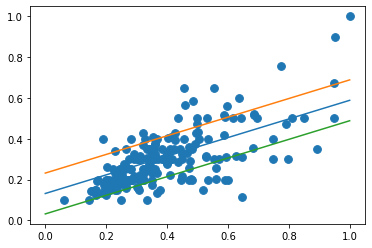

In [39]:
y_sup = y_func+epsilon1 
y_inf = y_func-epsilon1 
x_points = X_train_normalizada["total_bill"]
y_points = y_train_normalizada

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.plot(x_func,y_sup)
ax.plot(x_func,y_inf)
ax.scatter(x_points,y_points,s=60)

Y para cada modleo se pueden obtener como tal los vectores de soporte 

In [43]:
modeloV_SVR.support_vectors_

array([[0.18893919],
       [0.74808109],
       [0.28163747],
       [0.77583153],
       [0.53493407],
       [0.49753985],
       [0.53237552],
       [0.95000984],
       [0.59161582],
       [0.89254084],
       [0.49773667],
       [0.79807125],
       [0.56189726],
       [0.30879748],
       [0.37551663],
       [0.59948829],
       [0.36685692],
       [0.3023027 ],
       [0.64613265],
       [0.58748278],
       [0.22849833],
       [0.51977957],
       [0.59830742],
       [0.30348357],
       [0.47254477],
       [0.35268648],
       [0.334383  ],
       [0.24798268],
       [0.63766975],
       [0.3682346 ],
       [0.32119661],
       [1.        ],
       [0.4831726 ],
       [0.4375123 ],
       [0.44912419],
       [0.55973234],
       [0.32631372],
       [0.47766188],
       [0.35071836],
       [0.62684511],
       [0.48632159],
       [0.44617201],
       [0.95119071],
       [0.42708128],
       [0.64751033],
       [0.45916158],
       [0.55441842],
       [0.589

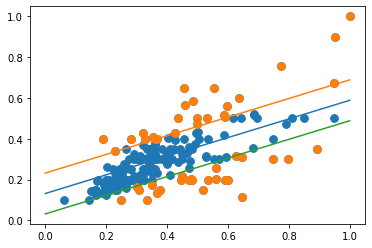

In [41]:
x_soporte = [X_train_normalizada["total_bill"].to_numpy()[int(i)] for i in modeloV_SVR.support_]
y_soporte = [y_train_normalizada.to_numpy()[int(i)] for i in modeloV_SVR.support_]

fig, ax = plt.subplots()
ax.plot(x_func, y_func)
ax.plot(x_func, y_sup)
ax.plot(x_func, y_inf)
ax.scatter(x_points, y_points, s=60)
ax.scatter(x_soporte, y_soporte, s=60)


#### Vamos a probar diferentes valores de epsilon

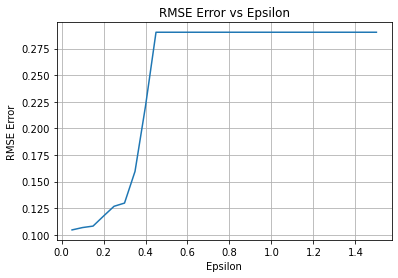

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

epsilons = np.arange(0.05, 1.55, 0.05)  # Array of epsilon values from 0.05 to 1.5 with a step of 0.05
rmse_errors = []

for epsilon in epsilons:
    modelo_SVR = SVR(kernel='linear', C=1, epsilon=epsilon)
    modelo_SVR.fit(X_train_normalizada, y_train_normalizada)
    y_pred_SVR = modelo_SVR.predict(X_test_normalizada)
    rmse = mean_squared_error(y_test_normalizada, y_pred_SVR, squared=False)
    rmse_errors.append(rmse)

# Plotting the RMSE errors
plt.plot(epsilons, rmse_errors)
plt.xlabel('Epsilon')
plt.ylabel('RMSE Error')
plt.title('RMSE Error vs Epsilon')
plt.grid(True)
plt.show()


El modelo Regresion_Lineal otorgaba RMSE promedios de 0.05, por lo que en este caso resultó un mejor modelo para la predición de la propina que lo que fue el SVR